# Data Studios project 1

In [2]:
cd Desktop/

/Users/ioannisantypas/Desktop


In [3]:
ls


19511385_10158959370980261_7376014237931049395_n.jpg
Jupyter Notebook.app/
Lede/
Screen Shot 2017-07-09 at 12.57.58 PM.png
Screen Shot 2017-07-09 at 3.17.20 PM.png
columbia/
data project/
data-studios/
data_is_beautiful/
governmentdebt.csv
hero_Okja-2017.jpg
pension.csv
www.bbc.com:news:business-39947942.webloc


In [4]:
cd Lede/

/Users/ioannisantypas/Desktop/Lede


In [5]:
cd ..

/Users/ioannisantypas/Desktop


In [6]:
ls

19511385_10158959370980261_7376014237931049395_n.jpg
Jupyter Notebook.app/
Lede/
Screen Shot 2017-07-09 at 12.57.58 PM.png
Screen Shot 2017-07-09 at 3.17.20 PM.png
columbia/
data project/
data-studios/
data_is_beautiful/
governmentdebt.csv
hero_Okja-2017.jpg
pension.csv
www.bbc.com:news:business-39947942.webloc


In [7]:
cd data-studios/

/Users/ioannisantypas/Desktop/data-studios


In [8]:
ls

Data_projects/  trial datasets/


In [9]:
cd Data_projects/

/Users/ioannisantypas/Desktop/data-studios/Data_projects


In [10]:
ls

README.md                   docs/
Test stuff/                 index.md
data_project_1/             medium-missing_person_file


In [11]:
cd data_project_1/

/Users/ioannisantypas/Desktop/data-studios/Data_projects/data_project_1


In [12]:
ls

mm6539a3.pdf


# Part 1 Working with the MMR dataset

In [259]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
import selenium
from selenium import webdriver
driver = webdriver.Chrome()
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
import numpy as np
from numpy import array
import re
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
%matplotlib inline
from shapely.geometry import Polygon





In [209]:
driver.get('https://www.cdc.gov/vaccines/imz-managers/coverage/schoolvaxview/pubs-resources.html')
driver.find_element_by_xpath("//*[@id='contentArea']/div[1]/div/ul/li[1]/a").click()   
scrape_years_15_16 = []
years_15_16 = []
table15_16 = driver.find_element_by_xpath('//*[@id="CDCTable_0"]/tbody')
for i in table15_16.find_elements_by_xpath('.//td'):
    scrape_years_15_16.append(i.text)
del(scrape_years_15_16[0:5])
chunks = [scrape_years_15_16[x:x+9] for x in range(0, len(scrape_years_15_16), 9)]
df2015_16 =  pd.DataFrame(chunks, columns=['State/Area', 'Delete', 'Delete', 'Delete', 'Delete', 'MMR2 doses(%) 2015/16', 'Delete', 'Delete', 'Delete'])  
del(df2015_16['Delete'])
df2015_16.to_csv("2015_16.csv", index=False) 





In [210]:
driver.back()
driver.get('https://www.cdc.gov/vaccines/imz-managers/coverage/schoolvaxview/pubs-resources.html')
driver.find_element_by_xpath("//*[@id='contentArea']/div[1]/div/ul/li[2]/a").click()   
scrape_years_14_15 = []
years_14_15 = []
table14_15 = driver.find_element_by_xpath('//*[@id="table-5"]/tbody')
for i in table14_15.find_elements_by_xpath('.//td'):
    scrape_years_14_15.append(i.text)
    
del(scrape_years_14_15[0:9])
chunks = [scrape_years_14_15[x:x+8] for x in range(0, len(scrape_years_14_15), 8)]
df2014_15 =  pd.DataFrame(chunks, columns=['State/Area', 'Delete', 'Delete', 'Delete', 'Delete', 'MMR2 doses(%) 2014/15', 'Delete', 'Delete'])  
del(df2014_15['Delete'])
df2014_15.to_csv("2014_15.csv", index=False) 






In [208]:
df2014_15

,State/Area,MMR2 doses(%) 2014/15
0,Alabama††,≥93.5
1,Arizona,94.2
2,Arkansas§§,88.4
3,California§§,92.6
4,Connecticut††,97.0
5,District of Columbia††,90.4
6,Florida††¶¶,≥93.3
7,Georgia††,≥94.0
8,Idaho††,89.5
9,Illinois††,94.7


In [265]:
df_oubreaks = pd.read_csv('Source_data_for_CFR_vaccine_map-Sheet1.csv', nrows=386)

In [267]:
df_oubreaks.tail()

,X,Y,Category,Outbreak,Location,Continent,Lat,Long,Date,Year,Cases,Fatalities,Impact Scale,Source Citation,Source
381,-9.862560,10.169370,Other,Ebola,Guinea,Africa,10.169370,-9.862560,12/2013-6/2014,2014,233,0,Epidemic,"CDC. ""Outbreak of Ebola in Guinea, Liberia, an...",http://www.cdc.gov/vhf/ebola/outbreaks/guinea/
382,-9.862560,10.169370,Measles,Measles,Guinea,Africa,10.169370,-9.862560,11/2013-6/2014,2014,129,12,Epidemic,"AllAfrica. ""Guinea: Curbing Guinea's Other Out...",http://allafrica.com/stories/201406121441.html
383,-14.751950,12.008000,Measles,Measles,Guinea,Africa,12.008000,-14.751950,3/2015,2015,12,0,Cluster,"African Press Agency. ""G/Bissau records 12 mea...",http://en.starafrica.com/news/gbissau-records-...
384,-14.751950,12.008000,Measles,Measles,Guinea,Africa,12.008000,-14.751950,4/2017,2017,3468,14,Epidemic,"Prusak, Brienne. ""Guinea: Battling a Large-Sca...",http://www.doctorswithoutborders.org/article/d...
385,-72.285215,18.971187,Other,Diphtheria,Haiti,North America,18.971187,-72.285215,10/2009,2009,33,15,Cluster,"Berger, Stephen.",Diphtheria: Global Status 2010


In [268]:
df_oubreaks.Continent.value_counts()

North America    91
Australia        84
Africa           84
Europe           60
Asia             36
South America    27
Oceania           1
Asia              1
Europe            1
Australia         1
Name: Continent, dtype: int64

In [269]:
df_outbreaks_USA = df_oubreaks[df_oubreaks.Continent.isin(['North America'])]

In [270]:
df_outbreaks_USA.head()

,X,Y,Category,Outbreak,Location,Continent,Lat,Long,Date,Year,Cases,Fatalities,Impact Scale,Source Citation,Source
169,-73.549136,51.939964,Mumps,Mumps,Canada (Quebec),North America,51.939964,-73.549136,6/2009,2009,15,0,Cluster,"MMWR. ""Mumps Outbreak --- New York, New Jersey...",http://www.cdc.gov/mmwr/preview/mmwrhtml/mm58d...
170,-116.576504,53.933271,Measles,Measles,Canada (Alberta),North America,53.933271,-116.576504,5/2010,2010,4,0,Secondary,"Nestibo, Lindsay et al. “Differentiating the W...",http://www.ncbi.nlm.nih.gov/pmc/articles/PMC33...
171,-127.647621,53.726668,Measles,Measles,Canada (British Columbia),North America,53.726668,-127.647621,3/2010,2010,78,0,Secondary,"BC Centre for Disease Control, ""Measles Epidem...",http://www.bccdc.ca/resource-gallery/Documents...
172,-75.698194,47.411572,Measles,Measles,Canada (Ottawa),North America,47.411572,-75.698194,12/2010,2010,1,0,Isolated,"Long, Jamie. ""Red alert by MOH after woman dev...",http://www.ottawasun.com/news/ottawa/2010/12/0...
173,-117.576500,55.933270,Measles,Measles,Canada (Alberta),North America,55.933270,-117.576500,08/2011,2011,1,0,Isolated,"Gray, Marilyn. ""Measles case confirmed at Edmo...",http://www.hintonparklander.com/ArticleDisplay...


In [271]:
points = df_outbreaks_USA.apply(lambda row: Point(row.Long, row.Lat), axis=1)
points_outbreaks_USA = gpd.GeoDataFrame(df_outbreaks_USA, geometry=points)
points_outbreaks_USA.crs = {'init': 'epsg:4326'}




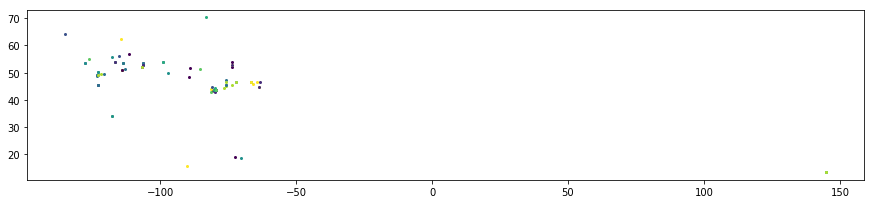

In [272]:
points_outbreaks_USA.plot(figsize=(15,15))

In [276]:
states = gpd.read_file('/Users/ioannisantypas/Desktop/Lede/07.03.17-class-25-foundation/13-classwork/13-homework/cb_2016_us_state_500k/cb_2016_us_state_500k.shx')
states = states.to_crs({'init': 'epsg:4326'})


In [277]:
bounds =   [[
              -138.515625,
              22.59372606392931
            ],
            [
              -56.25,
              22.59372606392931
            ],
            [
              -56.25,
              50.84757295365389
            ],
            [
              -138.515625,
              50.84757295365389
            ],
            [
              -138.515625,
              22.59372606392931
            ]]
            
continental_poly = Polygon(bounds)

states.to_crs({'init': 'epsg:4326'}).within(continental_poly).head(10)
continental = states[states.to_crs({'init': 'epsg:4326'}).within(continental_poly)]

(-148.98969705000002, 158.78341805000002, 10.60152645, 73.142544549999997)

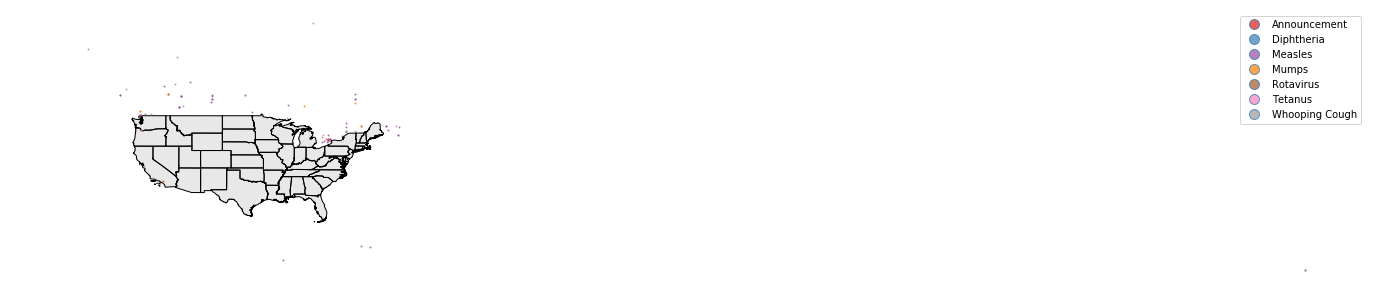

In [278]:
ax = states[states.to_crs({'init': 'epsg:4326'}).within(continental_poly)].plot(figsize=(24,24), color='lightgray')
points_outbreaks_USA.plot(markersize=1, alpha=0.7, ax=ax, column='Outbreak', legend=True)
ax.axis('off')



In [279]:
states.crs

{'init': 'epsg:4326'}

In [280]:
points_outbreaks_USA.crs

{'init': 'epsg:4326'}